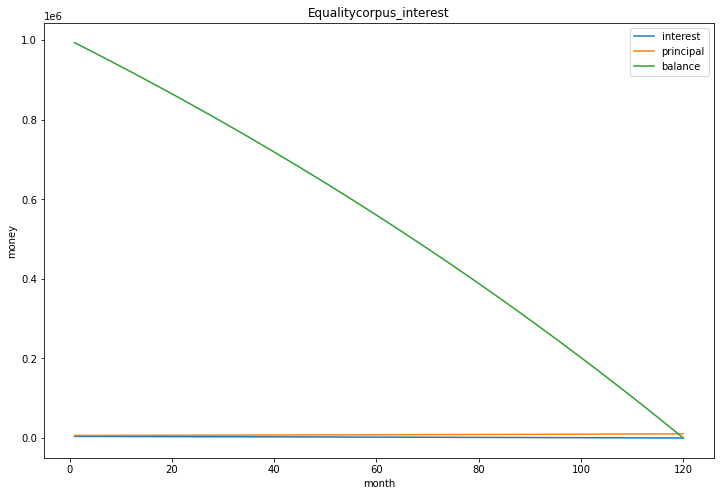

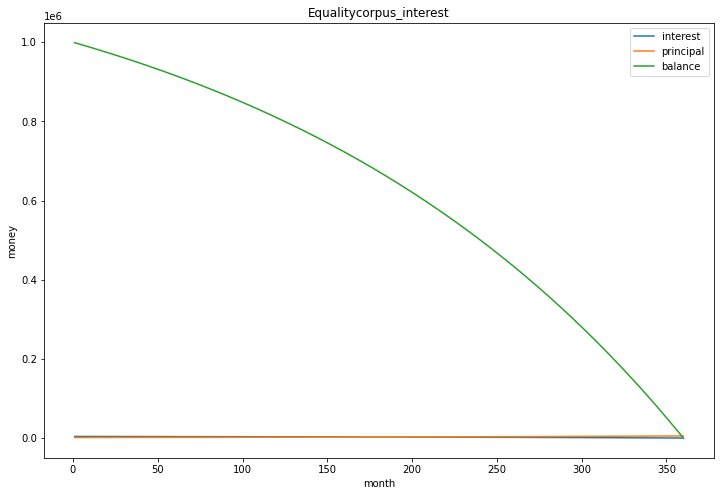

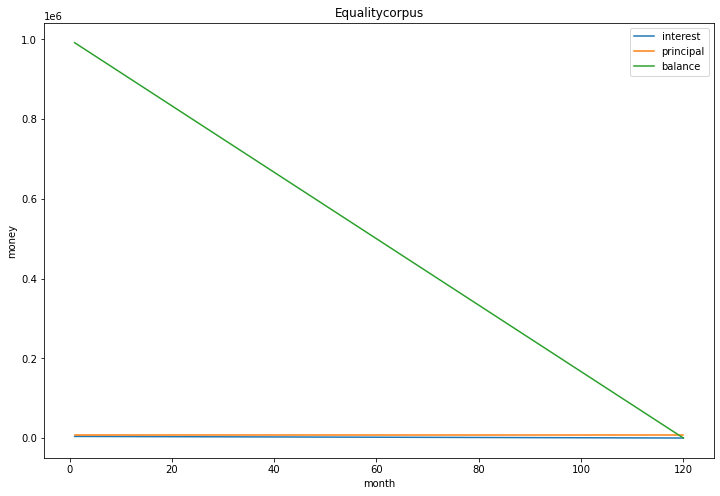

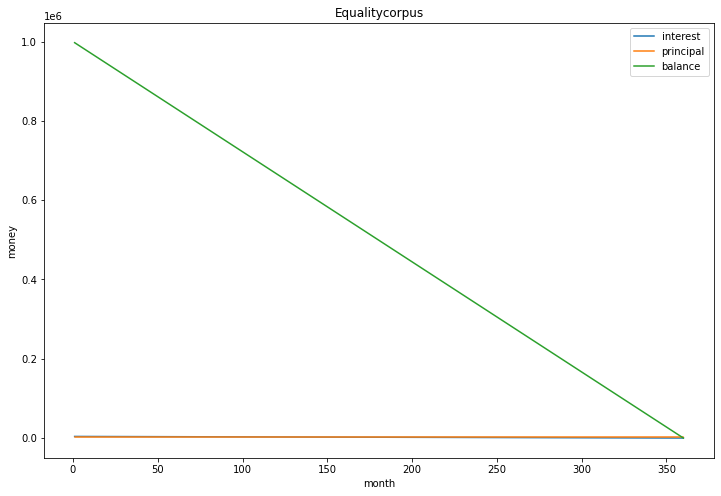

In [2]:
#目前首套房房贷利率调整至4.85%，注意计算时采用的月利率（当前利率/12）,计算贷款100万，10年、30年期，每月分别需要还款多少，用于测试程序。
# 1.导入模块
import numpy as np
import matplotlib.pyplot as plt
#分别创建两个类:Equalitycorpus_interest和Equalitycorpus
class Equalitycorpus_interest:
    #等额本息
    def __init__(self,loan,year,rate):
        self.loan = loan
        self.year = year
        self.rate = rate
        self.month_pay = loan_calculator(loan,year,rate)
        self.month_rate = rate/12
        self.month_interest = []
        self.month_principal = []
        self.month_balance = []
        self.month = []
        self.month_interest.append(self.loan*self.month_rate)
        self.month_principal.append(self.month_pay-self.month_interest[0])
        self.month_balance.append(self.loan-self.month_principal[0])
        self.month.append(1)
        for i in range(1,year*12):
            self.month_interest.append(self.month_balance[i-1]*self.month_rate)
            self.month_principal.append(self.month_pay-self.month_interest[i])
            self.month_balance.append(self.month_balance[i-1]-self.month_principal[i])
            self.month.append(i+1)
        self.month_interest = np.array(self.month_interest)
        self.month_principal = np.array(self.month_principal)
        self.month_balance = np.array(self.month_balance)
        self.month = np.array(self.month)
    def plot(self):
        plt.figure(figsize=(12,8))
        plt.plot(self.month,self.month_interest,label='interest')
        plt.plot(self.month,self.month_principal,label='principal')
        plt.plot(self.month,self.month_balance,label='balance')
        plt.legend()
        plt.xlabel('month')
        plt.ylabel('money')
        plt.title('Equalitycorpus_interest')
        plt.show()
    def __str__(self):
        return 'Equalitycorpus_interest:loan={},year={},rate={}'.format(self.loan,self.year,self.rate)
class Equalitycorpus:
    #等额本金
    def __init__(self,loan,year,rate):
        self.loan = loan
        self.year = year
        self.rate = rate
        self.month_pay = loan_calculator(loan,year,rate)
        self.month_rate = rate/12
        self.month_interest = []
        self.month_principal = []
        self.month_balance = []
        self.month = []
        self.month_interest.append(self.loan*self.month_rate)
        self.month_principal.append(self.loan/year/12)
        self.month_balance.append(self.loan-self.month_principal[0])
        self.month.append(1)
        for i in range(1,year*12):
            self.month_interest.append(self.month_balance[i-1]*self.month_rate)
            self.month_principal.append(self.loan/year/12)
            self.month_balance.append(self.month_balance[i-1]-self.month_principal[i])
            self.month.append(i+1)
        self.month_interest = np.array(self.month_interest)
        self.month_principal = np.array(self.month_principal)
        self.month_balance = np.array(self.month_balance)
        self.month = np.array(self.month)
    def plot(self):
        plt.figure(figsize=(12,8))
        plt.plot(self.month,self.month_interest,label='interest')
        plt.plot(self.month,self.month_principal,label='principal')
        plt.plot(self.month,self.month_balance,label='balance')
        plt.legend()
        plt.xlabel('month')
        plt.ylabel('money')
        plt.title('Equalitycorpus')
        plt.show()
    def __str__(self):
        return 'Equalitycorpus:loan={},year={},rate={}'.format(self.loan,self.year,self.rate)
#计算每月还款额
def loan_calculator(loan,year,rate):
    month_rate = rate/12
    month_pay = loan*month_rate*(1+month_rate)**(year*12)/((1+month_rate)**(year*12)-1)
    return month_pay
# 2.创建对象
#等额本息
e1 = Equalitycorpus_interest(1000000,10,0.0485)
e2 = Equalitycorpus_interest(1000000,30,0.0485)
#等额本金
e3 = Equalitycorpus(1000000,10,0.0485)
e4 = Equalitycorpus(1000000,30,0.0485)
# 3.调用方法
e1.plot()
e2.plot()
e3.plot()
e4.plot()